# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
import seaborn as sns

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# load datasets

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [3]:
df_08.fuel.value_counts()

Gasoline    984
gas           1
CNG           1
ethanol       1
Name: fuel, dtype: int64

In [4]:
df_08.query('fuel != "Gasoline"')

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
388,HONDA Civic,1.8,4,Auto-L5,2WD,CNG,small car,9.5,24.0,36.0,28.0,9,yes
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no
986,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4.0,18.0,25.0,21.0,6,no


In [5]:
df_18.query('fuel != "Gasoline"').drop_duplicates(subset='model').count()

model                   37
displ                   37
cyl                     37
trans                   37
drive                   37
fuel                    37
veh_class               37
air_pollution_score     37
city_mpg                37
hwy_mpg                 37
cmb_mpg                 37
greenhouse_gas_score    37
smartway                37
dtype: int64

In [6]:
df_08.query('fuel != "Gasoline"').count() 

model                   3
displ                   3
cyl                     3
trans                   3
drive                   3
fuel                    3
veh_class               3
air_pollution_score     3
city_mpg                3
hwy_mpg                 3
cmb_mpg                 3
greenhouse_gas_score    3
smartway                3
dtype: int64

In [7]:
df_18.fuel.value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [8]:
df_18.shape[0]

832

### Q2: How much have vehicle classes improved in fuel economy?  

In [9]:
df_08_gb_vc = df_08.drop(['displ','cyl','air_pollution_score','greenhouse_gas_score'], axis=1).groupby('veh_class').mean()
df_08_gb_vc

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,16.507143,21.935714,18.471429
large car,15.836364,23.345455,18.509091
midsize car,18.826087,26.565217,21.601449
minivan,16.882353,23.705882,19.117647
pickup,14.578313,19.204819,16.277108
small car,18.372372,25.963964,21.105105
station wagon,19.633333,27.116667,22.366667
van,13.142857,17.333333,14.952381


In [10]:
df_18_gb_vc = df_18.drop(['displ','cyl','air_pollution_score','greenhouse_gas_score'], axis=1).groupby('veh_class').mean()
df_18_gb_vc

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
large car,20.420455,28.795455,23.409091
midsize car,24.862319,33.057971,27.884058
minivan,18.000000,25.400000,20.800000
pickup,16.551282,22.012821,18.589744
small SUV,21.666667,27.879630,24.074074
small car,22.561404,30.435088,25.421053
special purpose,16.600000,21.300000,18.500000
standard SUV,16.011628,21.953488,18.197674
station wagon,24.705882,32.058824,27.529412


In [11]:
matching_indices = df_08_gb_vc.index.intersection(df_18_gb_vc.index)
df_18_gb_vc[df_18_gb_vc.index.isin(matching_indices)] - df_08_gb_vc[df_08_gb_vc.index.isin(matching_indices)] 

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
large car,4.584091,5.450000,4.900000
midsize car,6.036232,6.492754,6.282609
minivan,1.117647,1.694118,1.682353
pickup,1.972969,2.808001,2.312635
small car,4.189031,4.471124,4.315948
station wagon,5.072549,4.942157,5.162745


In [12]:
df_08_gb_vc[df_08_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,16.507143,21.935714,18.471429


In [13]:
df_18_gb_vc[df_18_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
small SUV,21.666667,27.879630,24.074074
standard SUV,16.011628,21.953488,18.197674


In [14]:
df_18_gb_suv =  df_18_gb_vc.query("veh_class == 'standard SUV'").rename(index={'standard SUV' : 'SUV'})
df_18_gb_suv - df_08_gb_vc[df_08_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,-0.495515,0.017774,-0.273754


In [15]:
ser_18_gb_vc_SUV_mean = df_18_gb_vc[df_18_gb_vc.index.str.contains('SUV')].mean(axis=0)
df_18_mean_SUV = pd.DataFrame(ser_18_gb_vc_SUV_mean).transpose()
df_18_mean_SUV.index.name = 'veh_class'
df_18_mean_SUV.rename(index={0:'SUV'}, inplace=True)
df_18_mean_SUV - df_08_gb_vc[df_08_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,2.332004,2.980845,2.664446


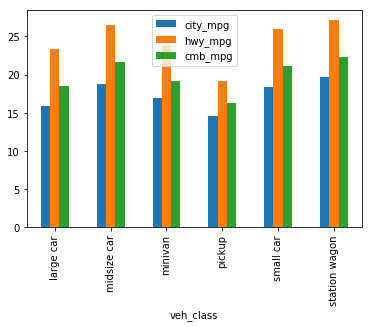

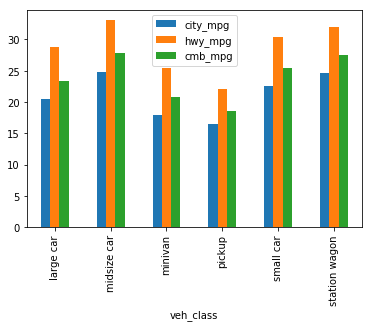

In [16]:
df_08_gb_vc[df_08_gb_vc.index.isin(matching_indices)].plot.bar();

df_18_gb_vc[df_18_gb_vc.index.isin(matching_indices)].plot.bar();

In [17]:
df_18_mean_SUV - df_08_gb_vc[df_08_gb_vc.index.str.contains('SUV')]

,city_mpg,hwy_mpg,cmb_mpg
veh_class,,,
SUV,2.332004,2.980845,2.664446


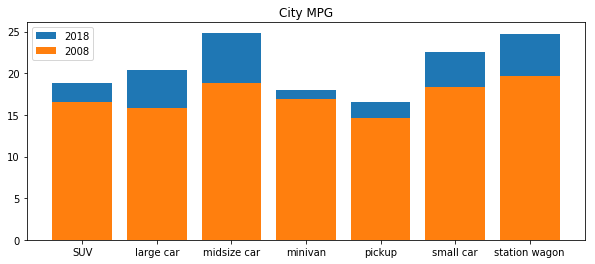

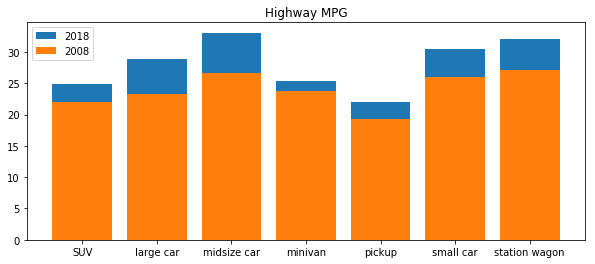

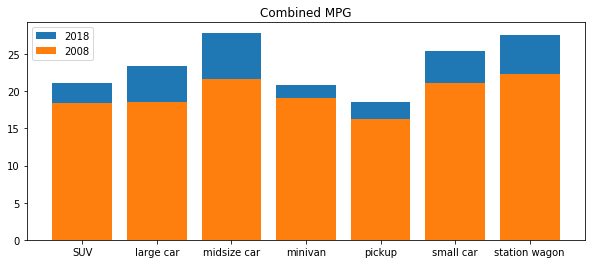

In [18]:
from matplotlib.pyplot import figure
figure(figsize=(10, 4))
#df_08_gb_vc[df_08_gb_vc.index == 'large car'].plot.bar();
#df_18_gb_vc[df_18_gb_vc.index == 'large car'].plot.bar();

t1 = df_08_gb_vc[df_08_gb_vc.index.isin(matching_indices)] 
t1 = t1.append(df_08_gb_vc[df_08_gb_vc.index.str.contains('SUV')])
#[df_08_gb_vc.index == 'large car']
t2 = df_18_gb_vc[df_18_gb_vc.index.isin(matching_indices)]
t2 = t2.append(df_18_mean_SUV)
#[df_18_gb_vc.index == 'large car']

plt.title('City MPG')
plt.bar(t2.index, t2.city_mpg);
plt.bar(t1.index, t1.city_mpg);
plt.legend(['2018','2008'])
plt.show()

figure(figsize=(10, 4))
plt.title('Highway MPG')
plt.bar(t2.index, t2.hwy_mpg);
plt.bar(t1.index, t1.hwy_mpg);
plt.legend(['2018','2008'])
plt.show()
figure(figsize=(10, 4))
plt.title('Combined MPG')
plt.bar(t2.index, t2.cmb_mpg);
plt.bar(t1.index, t1.cmb_mpg);
plt.legend(['2018','2008'])
plt.show()

#sns.barplot(x=t1.index, y=t2.columns.values);
#sns.barplot(x=t2.index');
#t2.index.values
#t2.columns.values
#plt.bar(t2.index, t2);
#plt.bar(t1.index, t1.cmb_mpg);

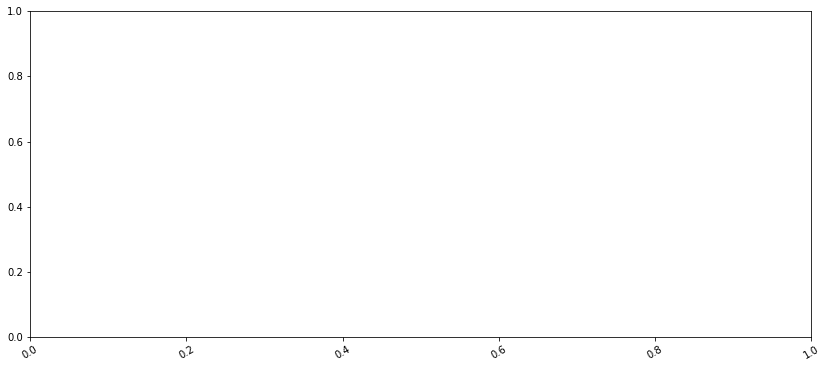

In [19]:
veh_08 = df_08.groupby('veh_class')[['city_mpg','hwy_mpg','cmb_mpg']].mean().reset_index()
df = pd.melt(veh_08, id_vars=['veh_class'], value_vars=['city_mpg','hwy_mpg','cmb_mpg'])
df['year']=2008

veh_18 = df_18.groupby('veh_class')[['city_mpg','hwy_mpg','cmb_mpg']].mean().reset_index()
df2 = pd.melt(veh_18, id_vars=['veh_class'], value_vars=['city_mpg','hwy_mpg','cmb_mpg'])
df2['year']=2018

df = pd.concat([df,df2])
#df3 = df.groupby(['veh_class','variable']).sum().reset_index()
#df3['year'] = 'combined'
#df = pd.concat([df,df3])
df.sort_values(by=['veh_class','variable','year'], inplace=True)
df

plt.figure(figsize=(14,6));
veh = 'station wagon'
veh2 = 'pickup'
veh3 = 'small car'
veh4_08 = 'SUV'
veh4_18 = 'standard SUV'
#ax = sns.barplot(x='veh_class', y='value', hue='variable', data=df[(df['year']==2008) & ((df.veh_class == veh) | (df.veh_class == veh2) | (df.veh_class == veh3) | (df.veh_class == veh4_08))], alpha=1);
#ax = sns.barplot(x='veh_class', y='value', hue='variable', data=df[(df['year']==2018) & ((df.veh_class == veh) | (df.veh_class == veh2) | (df.veh_class == veh3) | (df.veh_class == veh4_18))], alpha=.5);
#ax = sns.barplot(x='veh_class', y='value', hue='variable', data=df[(df['year']==2018)], alpha=.5);
#ax = sns.barplot(x='veh_class', y='value', hue='variable', data=df[(df['year']==2008)], alpha=1);

plt.xticks(rotation=30);

In [20]:
df[df.year == 2008]

,veh_class,variable,value,year
0,SUV,city_mpg,16.507143,2008
16,SUV,cmb_mpg,18.471429,2008
8,SUV,hwy_mpg,21.935714,2008
1,large car,city_mpg,15.836364,2008
17,large car,cmb_mpg,18.509091,2008
9,large car,hwy_mpg,23.345455,2008
2,midsize car,city_mpg,18.826087,2008
18,midsize car,cmb_mpg,21.601449,2008
10,midsize car,hwy_mpg,26.565217,2008
3,minivan,city_mpg,16.882353,2008


### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

According to the following documentations:
2008 rating     
Vehicles that get a combined score of ≥ 18 (minimum GHG score = 9; minimum air pollution score = 9)
Vehicles that get a combined score of ≥ 13 (minimum GHG score = 6; minimum air pollution score = 6)

2018
For vehicles that get a minimum GHG rating = 10; minimum smog rating = 7
For vehicles that get a minimum GHG rating = 7; minimum smog rating = 3


https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P100FZHT.pdf 
https://nepis.epa.gov/Exe/ZyPDF.cgi?Dockey=P100TWV5.pdf



In [21]:
df08_sw = df_08.query('smartway != "no"')
df08_sw.sample(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
378,HONDA Accord,3.5,6,Auto-L5,2WD,Gasoline,small car,9.5,19.0,28.0,22.0,6,yes
826,SUBARU Legacy,2.5,4,Man-5,4WD,Gasoline,small car,9.5,20.0,27.0,22.0,6,yes
674,NISSAN Altima,2.5,4,Auto-AV,2WD,Gasoline,small car,6.0,23.0,31.0,26.0,8,yes


In [22]:
df18_sw = df_18.query('smartway != "No"')
df18_sw.sample(3)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
792,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Gasoline,small SUV,7.0,26.0,28.0,26.0,10,Elite
175,CHEVROLET Cruze Hatchback,1.6,4,Man-6,2WD,Diesel,midsize car,3.0,29.0,48.0,35.0,7,Yes
571,MINI Cooper Hardtop,1.5,3,Man-6,2WD,Gasoline,small car,7.0,28.0,38.0,32.0,7,Yes


In [23]:
df_08.smartway.value_counts()

no     607
yes    380
Name: smartway, dtype: int64

In [24]:
df_18.smartway.value_counts()

No       724
Yes       91
Elite     17
Name: smartway, dtype: int64

In [25]:
# There are more cars that qualified for smartway in 2008 than 2018. They have become much more stricter 

In [26]:
print('Percent of cars with Smartway certification for 2008')
print(round((len(df_08.query('smartway == "yes"')) / len(df_08))*100,2),"%")
print('Percent of cars with Smartway certification for 2018')
print(round((len(df_18.query('smartway != "No"')) / len(df_18))*100,2),"%")

Percent of cars with Smartway certification for 2008
38.5 %
Percent of cars with Smartway certification for 2018
12.98 %


In [27]:
len(df08_sw)

380

In [28]:
len(df18_sw)

108

In [29]:
df08_sw.veh_class.value_counts()

small car        177
midsize car       80
SUV               60
station wagon     34
large car         22
pickup             5
minivan            2
Name: veh_class, dtype: int64

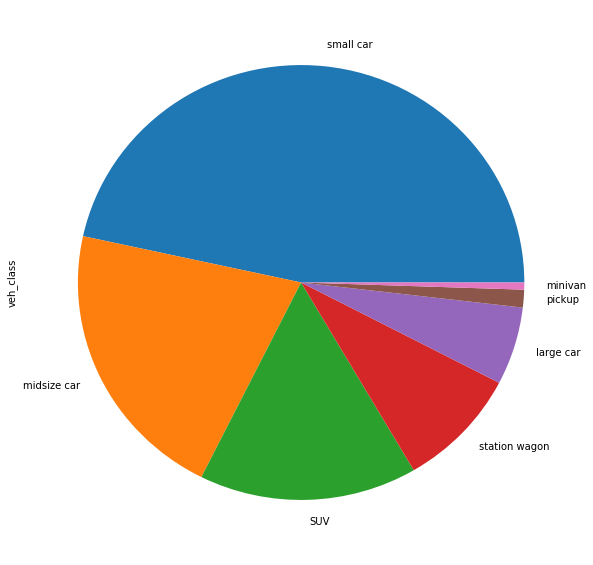

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
df08_sw.veh_class.value_counts().plot.pie();

In [31]:
df18_sw.veh_class.value_counts()

small car        43
midsize car      41
station wagon     9
large car         9
small SUV         4
standard SUV      2
Name: veh_class, dtype: int64

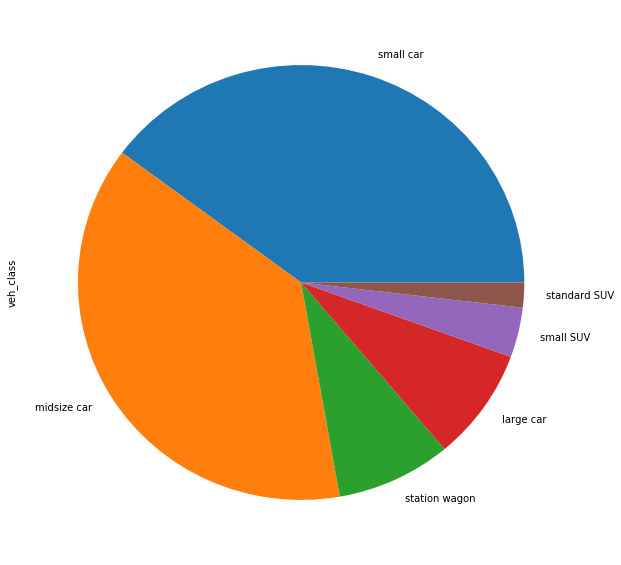

In [32]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
df18_sw.veh_class.value_counts().plot.pie();

In [33]:
df08_sw.greenhouse_gas_score.value_counts()

7     160
6     142
8      66
9      10
10      2
Name: greenhouse_gas_score, dtype: int64

In [34]:
df18_sw.greenhouse_gas_score.value_counts()

7     59
10    22
8     20
9      7
Name: greenhouse_gas_score, dtype: int64

In [35]:
df08_sw.air_pollution_score.value_counts()

7.0    239
9.5     74
6.0     60
9.0      7
Name: air_pollution_score, dtype: int64

In [36]:
df18_sw.air_pollution_score.value_counts()

7.0    47
3.0    39
5.0    15
6.0     7
Name: air_pollution_score, dtype: int64

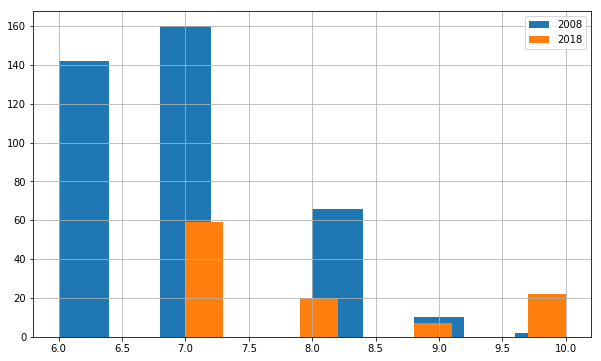

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6))

df08_sw.greenhouse_gas_score.hist();
df18_sw.greenhouse_gas_score.hist();
plt.legend(['2008','2018']);

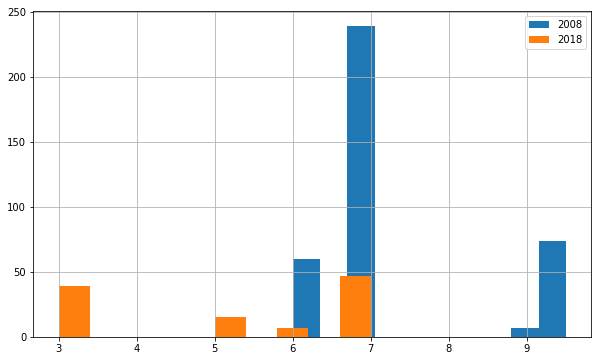

In [38]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6))
df08_sw.air_pollution_score.hist();
df18_sw.air_pollution_score.hist();
plt.legend(['2008','2018']);

### Q4: What features are associated with better fuel economy?

In [39]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

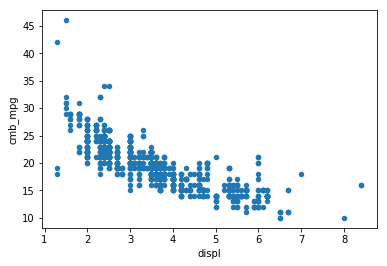

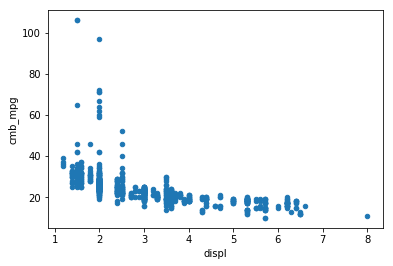

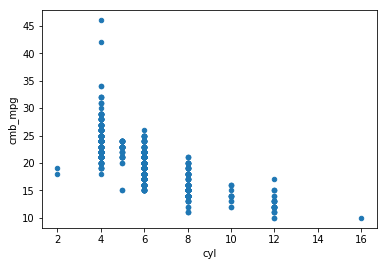

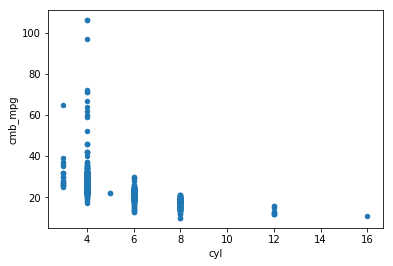

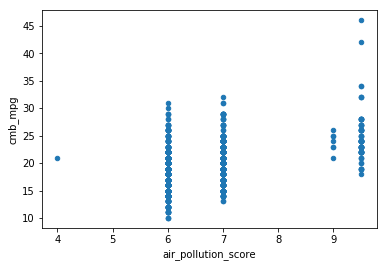

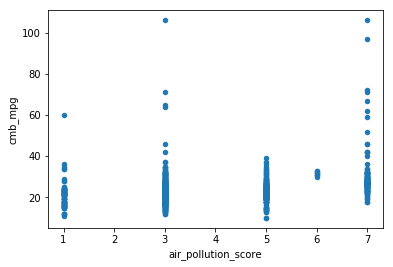

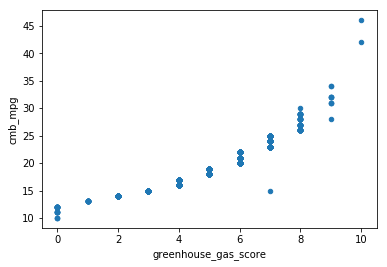

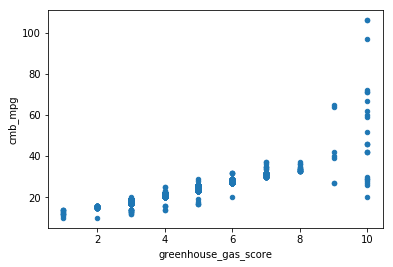

In [40]:
 #'trans', 'drive','fuel', 'veh_class',  'smartway'
features =  ['displ', 'cyl',  'air_pollution_score', 'greenhouse_gas_score']

for feature in features:
    df_08.plot(y='cmb_mpg', x=feature, kind='scatter');
    df_18.plot(y='cmb_mpg', x=feature, kind='scatter');

In [41]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

#### Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?
This is a question regarding models that were updated since 2008 and still being produced in 2018. In order to do this, we need a way to compare models that exist in both datasets. To do this, let's first learn about merges.

In [114]:

df_08_models = df_08.model.drop_duplicates().tolist()
df_18_models = df_18.model.drop_duplicates().tolist()
shared_models = list(set(df_08_models) & set(df_18_models))

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [115]:
df_08_gb_shared_models = df_08[df_08.model.isin(shared_models)].groupby('model')[['model',  'city_mpg', 'hwy_mpg', 'cmb_mpg']].mean().reset_index()
df_08_gb_shared_models = df_08_gb_shared_models.sort_values(by='model').set_index('model')
df_18_gb_shared_models = df_18[df_18.model.isin(shared_models)].groupby('model')[['model',  'city_mpg', 'hwy_mpg', 'cmb_mpg']].mean().reset_index()
df_18_gb_shared_models = df_18_gb_shared_models.sort_values(by='model').set_index('model')

In [123]:
df_gb_shared_models_diff = df_18_gb_shared_models.subtract(df_08_gb_shared_models)
df_gb_shared_models_diff

,city_mpg,hwy_mpg,cmb_mpg
model,,,
ACURA RDX,2.500000,5.500000,3.500000
AUDI A3,4.666667,5.333333,4.666667
AUDI A4,6.250000,6.750000,6.000000
AUDI A6,5.333333,6.333333,6.000000
AUDI A8 L,4.500000,8.000000,5.500000
AUDI Q7,6.000000,6.500000,6.000000
AUDI S4,7.500000,9.500000,8.500000
AUDI S5,7.000000,9.000000,8.000000
AUDI TT Coupe,3.666667,3.666667,4.333333


In [124]:
df_gb_shared_models_diff.mean()

city_mpg    3.387811
hwy_mpg     3.982158
cmb_mpg     3.718555
dtype: float64

In [126]:
df_gb_shared_models_diff.sort_values(by='cmb_mpg', ascending=False)

,city_mpg,hwy_mpg,cmb_mpg
model,,,
VOLVO XC 90,16.933333,15.333333,16.533333
CHEVROLET Malibu,12.250000,8.416667,10.666667
CHEVROLET Equinox,8.500000,8.666667,8.833333
AUDI S4,7.500000,9.500000,8.500000
AUDI S5,7.000000,9.000000,8.000000
VOLKSWAGEN Passat,6.750000,9.250000,7.750000
MERCEDES-BENZ C300,7.166667,8.666667,7.666667
SUBARU Impreza,6.250000,8.500000,7.250000
MAZDA 3,5.533333,7.266667,6.433333
